In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(100)
# Load the data
data = pd.read_csv('crime-train.txt', sep='\t')
test_data = pd.read_csv('crime-test.txt', sep='\t')

X_ = data[[c for c in data.columns if c!= 'ViolentCrimesPerPop']].values
y_ = data['ViolentCrimesPerPop'].values

X_test = test_data[[c for c in data.columns if c!= 'ViolentCrimesPerPop']].values
y_test = test_data['ViolentCrimesPerPop'].values

In [4]:
from pandas.core.frame import Scalar
from sklearn.preprocessing import StandardScaler
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.2)# TODO: Split the validation set as 20% of the train
scaler = StandardScaler() #subtracts of the mean, and scales the features
scaler.fit(X_train)
scaler.fit(X_val)# TODO: fit the scaler on X_train

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

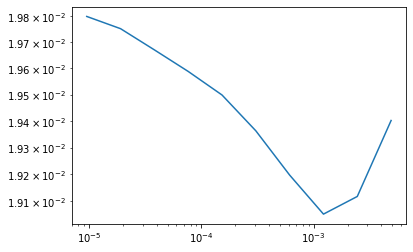

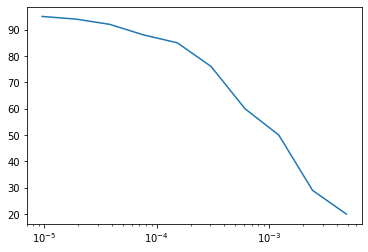

mean_square_error on test set 0.02169399992754103 relative mean_square_error 0.36966338041434665


In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

lambdas = [5/2**i for i in range(10,20)] #[5, 2.5, 1.25, ...]

val_errors = []
size_support = []

for i, lam in enumerate(lambdas):
        model = Lasso(alpha=lam, max_iter=10000)
        model.fit(X_train, y_train)
        val_errors.append(mean_squared_error(y_val, model.predict(X_val)))
        size_support.append(np.count_nonzero(model.coef_))
min_lam = lambdas[np.argmin(val_errors)]
best_model = Lasso(alpha=min_lam, max_iter=50000)
best_model.fit(X_train, y_train)

plt.plot(lambdas, val_errors)
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.plot(lambdas, size_support)
plt.xscale('log')
plt.show()

X_test = scaler.transform(X_test)#TODO: transform X_test using the scaler
y_test_predict = best_model.predict(X_test)
test_error = mean_squared_error(y_test, y_test_predict)
print('mean_square_error on test set', test_error,
      'relative mean_square_error', test_error/np.var(y_test))

In [7]:
arr = []
''''
#coefficients of all features
for feature, val in zip(data.columns[1:], best_model.coef_):
    if val != 0:
      print(feature, val)
'''
#coefficients of variables we wannt to keep after LASSO analysis (non zero coefficients)
for feature, val in zip(data.columns[1:], best_model.coef_):
    if val != 0:
      #print(feature, val)
      arr.append(feature)

print(arr) #all useful variables only

['population', 'householdsize', 'agePct12t29', 'agePct65up', 'pctUrban', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWRetire', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PersPerFam', 'PctKids2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctNotSpeakEnglWell', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctWOFullPlumb', 'OwnOccHiQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumStreet', 'PctForeignBorn', 'PopDens', 'PctUsePubTrans', 'LemasPctOfficDrugUn']


In [ ]:
#################
#create new data frame and run regression with optimal polynomial degree
#################

In [8]:
new_data = zip(data[arr],data['ViolentCrimesPerPop']) #data with only important variables
new_test_data = zip(test_data[arr], test_data['ViolentCrimesPerPop'])

In [9]:
#convert normal df to pandas df
new_data = pd.DataFrame(new_data)
new_test_data = pd.DataFrame(new_test_data)

In [10]:
#train test split
X_ = data[[c for c in data.columns if c!= 'ViolentCrimesPerPop']].values
y_ = data['ViolentCrimesPerPop'].values

X_test = test_data[[c for c in data.columns if c!= 'ViolentCrimesPerPop']].values
y_test = test_data['ViolentCrimesPerPop'].values

In [15]:
#splitting train into train and validation data 
from pandas.core.frame import Scalar
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.2)
scaler = StandardScaler() #subtracts of the mean, and scales the features
scaler.fit(X_train)
scaler.fit(X_val)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [19]:
degrees = list(range(1,30)) #getting a list of degrees
print(degrees)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [20]:
mse_dict = []
best_degree = 999999999999999999
best_mse = 999999999999999999999
for degree in degrees:
  poly = PolynomialFeatures(degree=degree)
  x_train_poly = poly.fit_transform(X_train)
  #y_train_poly = poly.transform(y_train.reshape(-1, 1))
  model = LinearRegression()
  model.fit(x_train_poly, y_train)
  y_pred = model.predict(x_train_poly)
  mse = mean_squared_error(y_train, y_pred)
  print(degree,mse)
  if mse < best_mse:
    best_mse = mse
    best_degree = degree

print(best_degree)

1 0.015914556648127326
2 7.981842350589188e-30


KeyboardInterrupt: ignored